<div style="text-align: right"> 08.11.2019</div>

***Name:*** Emma Degenhardt

# Hausaufgabe Blatt 3

## Integration einer Bewegungsgleichung: Freier Fall

In dieser Aufgabe werden wir die Bewegungsgleichung des freien Falls numerisch integrieren. Die Bewegungsgleichung in einer Dimension hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Die analytische Lösung dieser Gleichung kennen Sie bereits. Es handelt sich dabei um die Bahnkurve
\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

Ähnlich zur analytischen Lösung, werden wir die Bewegungsgleichung in zwei Schritten integrieren. Dabei nutzen wir aus, dass die Beschleunigung $a$ die zeitliche Ableitung der Geschwindigkeit $v$ und die Geschwindigkeit die zeitliche Ableitung der Position $x$ ist:
\begin{align*}
   \frac{\mathrm{d}x}{\mathrm{d}t}=  \dot x &= v \\
   \frac{\mathrm{d}v}{\mathrm{d}t}= \dot v &= a
\end{align*}

Zur numerischen Lösung dieser Gleichungen werden wir das sogenannte Euler-Verfahren verwenden. Bei diesem Verfahren wird das Integrationsintervall, in diesem Fall die Zeit, diskretisiert. Typischerweise nennt man den Zeitschritt $\Delta t$. Die Änderung in der Position $\Delta x$ und die Änderung der Geschwindigkeit $\Delta v$ ist daher gegeben durch:
\begin{align*}
    \Delta x &= v\left(t\right) \Delta t \\
       \Delta v &= a\Delta t
\end{align*}

Somit ergibt sich als neue Position und neue Geschwindigkeit nach einem Zeitschritt $\Delta t$:
    \begin{align}\tag{3}
        x\left(t+\Delta t \right) = x\left(t\right) + \Delta x \\ 
        v\left(t+\Delta t \right) = v\left(t\right) + \Delta v \tag{4}
    \end{align}
    
    
## 1. Integration "per Hand"
**a)** Bestimmen Sie Ort und Geschwindigkeit nach einem Zeitschritt $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch integrieren. Dabei soll $a=-9.81$ sein. Geben Sie die resultierende Position und Geschwindigkeit mit dem `print()` Befehl aus.


In [1]:
import numpy as np
x0=2
v0=1
a=-9.81
dt=0.1

def Geschw(v0,a,dt):
    v=v0+a*dt
    print(v)
    
def Ort(x0,v0,dt):
    x=x0+v0*dt
    print(x)
    
Geschw(v0,a,dt)
Ort(x0,v0,dt)

0.018999999999999906
2.1


**b)** Führen Sie die Integration fort, indem Sie das gerade berechnete Ergebnis für die Position und die Geschwindigkeit erneut gemäß Gleichungen (3) und (4) integrieren. Setzen Sie die Integration fort, bis sie fünf Werte $x_0,\; x_1,\; x_2,\; x_3,\; x_4$ für die Position errechnet haben. Geben Sie die Ergebnisse der Position mit dem `print()` Befehl aus

In [2]:
tstart=0          # Anfangswert Zeit
tend=0.5           # Endwert Zeit
deltat=0.1          # Zeitintervall
anzahlt=(tend-tstart)/deltat # Anzahl der Zeitintervalle
v=np.zeros((int(anzahlt),1)) # Definition der Geschwindigkeit vor der Berechnung (alles auf 0 setzen)
v[0]=v0                     #Startwert einsetzen
for k in range (1 , int ( anzahlt )): # for - Schleife zur Berechnung von v
    v [ k ]= v [k -1]+ deltat * a # Berechnung von v [ k ]

x=np.zeros((int(anzahlt),1))    
x[0]=x0                        #Startwert einsetzen
for l in range (1 , int ( anzahlt )):
    x [ l ]=x[l-1]+v[l-1]*deltat
print (np.transpose (x))         #Ausgabe x0-x4
y=np.transpose (x)
#print (y)

[[2.     2.1    2.1019 2.0057 1.8114]]


## 2. Vergleich mit Bahnkurve

Nun wollen wir die gerade errechneten Punkte mit der Bahnkurve (Gleichung (2)) vergleichen. Führen Sie dazu folgende Schritte durch:

**a)** Erstellen Sie einen Plot der Bahnkurve mit den Parametern aus der ersten Teilaufgabe. Benutzen Sie dafür das im vorherigen Zettel gegeben Gerüst.  Vergessen Sie nicht die Bibliotheken `numpy` und `matplotlib.pyplot` zu importieren!

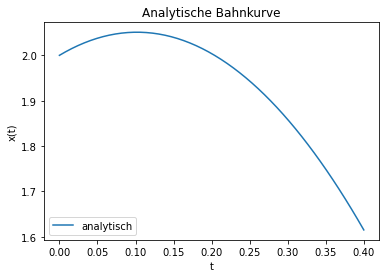

In [4]:
#analytisch
import matplotlib.pyplot as plt # lade matplotlib als Bibliothek
t = np.linspace (0, 0.4, 50)
t0=0
x0 = 2
v0 = 1
def Bahnkurve(x0,v0,t):  # Definition der Funktion mit deren Parametern
    a = -9.81  
    return x0 + v0*t + 0.5*a*t**2 # Definition der Variable x mithilfe zuvor definierter Parameter
    
Bahnk = Bahnkurve(x0,v0,t) #x(t)-Werte
#print (t, Bahnk)             #Ausgabe der t, x(t)-Werte

fig, ax = plt.subplots()

ax.set_title("Analytische Bahnkurve")  # Titel
ax.set_xlabel("t") # x-Achsenbeschriftrung
ax.set_ylabel("x(t)") # y-Achsenbeschriftung

plt.plot(t, Bahnk, label="analytisch")  # x-Wert hier: t, y Wert hier: x
#plt.scatter(t, xnI, label="numerisch")    # Vergleich mit numerischer, mit Werten für x(t) aus folgender Zelle
plt.legend(loc='lower left')
plt.show()

**b)** Schreiben Sie die errechneten Werte $x_0,\; x_1 ...$ in ein numpy Array per Hand. Wählen Sie einen geeigneten Variablennamen für dieses Array.

In [9]:
xnI =[2, 2.1, 2.1019, 2.0057, 1.8114]

**c)** Erstellen Sie mittels `np.linspace()` ein weiteres Array für die fünf Zeitpunkte der numerischen Integration. Wählen Sie einen geeigneten Variablennamen für dieses Array.

In [5]:
tnI = np.linspace(0, 0.4, 5)

**d)** Sie sollten nun zwei Arrays mit jeweils fünf Einträgen haben. Plotten Sie diese beiden arrays gegeneinander, indem Sie das vorhandene Gerüst mit folgender Zeile erweitern:
```python
ax.scatter(t, x, label='numerische Integration')
```
wobei `t` und `x` die zwei Arrays der numerischen Integration sind. Ändern Sie die Legende und die Achsenbeschriftungen, sodass Ihr Diagramm wie folgt ausssieht:

<img src="./bahnkurve.png" alt="drawing" width="400"/>

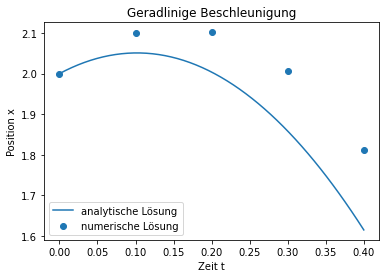

In [6]:
fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.set_xlabel("Zeit t") # x-Achsenbeschriftrung
ax.set_ylabel("Position x") # y-Achsenbeschriftung
ax.scatter(tnI, xnI, label="numerische Lösung")
plt.plot(t, Bahnk, label="analytische Lösung")

plt.legend(loc='lower left')
plt.show()

**e)** Wie Sie sehen, weicht die numerische Lösung von der analytischen ab. Dies liegt an der Genauigkeit des Lösungsverfahrens und an der Größe des Integrationsschrittes $\Delta t$. Wiederholen Sie daher die numerische Integration mit einem halb so großen Zeitschritt $\Delta t = 0.05$ bei sonst gleichen Anfangsbedingungen. Damit die Integrationszeit konstant bleibt, müssen Sie mehr Integrationsschritte durchführen. Machen Sie sich klar, wie viele Schritte Sie benötigen. Stellen Sie das Ergenbis erneut in einem Plot dar. Wählen Sie eine geeignete Legende.  Verlgeichen Sie die Trajektorien der beiden numerischen Lösungen. Was fällt Ihnen auf?

In [7]:
x0=2
v0=1
tstart=0          # Anfangswert Zeit
tend=0.4           # Endwert Zeit
deltat=0.05          # Zeitintervall
anzahlt=(tend-tstart)/deltat # Anzahl der Zeitintervalle
v=np.zeros((int(anzahlt),1)) # Definition der Geschwindigkeit vor der Berechnung (alles auf 0 setzen)
v[0]=v0                     #Startwert einsetzen
for k in range (1 , int ( anzahlt )): # for - Schleife zur Berechnung von v
    v [ k ]= v [k -1]+ deltat * a # Berechnung von v [ k ]

x=np.zeros((int(anzahlt),1))
x[0]=x0                        #Startwert einsetzen
for l in range (1 , int ( anzahlt )):
    x [ l ]=x[l-1]+v[l-1]*deltat
print (np.transpose (x))         #Ausgabe x0-x9

[[2.       2.05     2.075475 2.076425 2.05285  2.00475  1.932125 1.834975]]


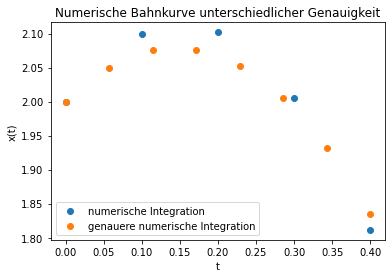

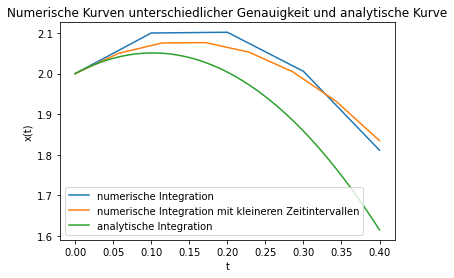

In [8]:
#analytisches mit genauerem numerischen

x2=[2, 2.05, 2.075475, 2.076425, 2.05285, 2.00475,  1.932125, 1.834975]     #umgeschriebene x-Werte, weil ich nicht weiß, wie man sie eleganter einsetzen kann

t2=np.linspace(0, 0.4, 8)  #gleiche Anzahl an y-Werten
fig, ax = plt.subplots()

ax.set_title("Numerische Bahnkurve unterschiedlicher Genauigkeit") # Titel
ax.set_xlabel("t") #x-Achsenbeschriftung
ax.set_ylabel("x(t)") # y-Achsenbeschriftung

ax.scatter(tnI, xnI, label="numerische Integration")
ax.scatter(t2, x2, label="genauere numerische Integration")


ax.legend()  # Zeige Legende
plt.show()    #Als Zusatz zum Geplotteten, was in der Aufgabe erwünscht ist

fig, ax = plt.subplots()

ax.set_title("Numerische Kurven unterschiedlicher Genauigkeit und analytische Kurve") # Titel
ax.set_xlabel("t") #x-Achsenbeschriftung
ax.set_ylabel("x(t)") # y-Achsenbeschriftung

ax.plot(tnI, xnI, label="numerische Integration")
ax.plot(t2, x2, label="numerische Integration mit kleineren Zeitintervallen")
plt.plot(t, Bahnk, label="analytische Integration")

ax.legend()  # Zeige Legende
plt.show()  

Es fällt auf, dass bei genauerer numerischer Integration das Geworfene schneller nach unten, da die Werte immer vom vorherigen abhängen und damit die Kurve mit größeren Intervallen "langsamer auf Änderungen reagiert" fällt und bei diesen Zeitintervallen die orange Kurve schon sehr genau aussieht.